In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import seaborn as sns
from scipy import stats
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures



pd.options.display.max_columns = 999  # Allos us to display all columns
pd.options.display.max_rows = 999  # Allos us to display all columns

df_train = pd.read_csv('../datasets/compdata/comp_cleaned_train_to_model.csv',keep_default_na=False)
df_test = pd.read_csv('../datasets/compdata/comp_cleaned_test_data.csv',keep_default_na=False)

df_train.columns = df_train.columns.str.lower() # column names to lower case
df_test.columns = df_test.columns.str.lower() # column names to lower case

## <span style='background :#3FBFBF' >*******************  Baseline *******************</span>  

In [2]:
df_train['base']=df_train['saleprice'].mean()
bl_MRSE = metrics.mean_squared_error(y_true=df_train['saleprice'], y_pred=df_train['base'] )**.5
print(f'Mean Root Square Error w/ all cols: {round(bl_MRSE,2)}.')

Mean Root Square Error w/ all cols: 79273.14.


## <span style='background :#3FBFBF' >*******************  Linear Regression *******************</span>  

In [3]:
features = [
 'overall qual',
'exter qual',
'gr liv area',
'kitchen qual',
'garage area',
'garage cars',
'total bsmt sf',
'1st flr sf',
'bsmt qual_ex',
'year built',
'year remod/add',
'full bath',
'foundation_pconc',
'totrms abvgrd',
'fireplace qu_na',
'fireplaces',
'bsmtfin type 1_glq',
'heating qc',
'bsmt qual_ta',
'neighborhood_nridght',
'garage finish_unf',
'mas vnr type_none',
'bsmtfin sf 1',
'garage finish_fin',
'exteriors',
'exterior 1st',
'fireplace qu_gd',
'exterior 2nd',
'bsmt exposure_gd',
'garage type_detchd',
'sale type_new',
'garage type_attchd',
'foundation_cblock',
'open porch sf',
'wood deck sf',
'lot frontage',
'mas vnr type_stone',
'lot area',
'lot shape',
'bsmt exposure_no',
'paved drive',
'bsmt full bath',
'half bath',
'ms zoning_rm',
'central air',
'garage cond_ta',
'roof style_hip',
'neighborhood_noridge',
'garage yr blt',
'mas vnr type_brkface',
'neighborhood_stonebr',
# 'pid',
'electrical_sbrkr',
'garage qual_ta',
'roof style_gable',
'2nd flr sf',
'fireplace qu_ex',
'ms zoning_rl',
'garage type_na',
'garage cond_na',
'garage finish_na',
'garage qual_na',
'foundation_brktil',
'bsmt qual_gd',
'garage type_builtin',
'conditions',
#'sale type_wd',
'land contour_hls',
'neighborhood_oldtown',
'condition 1',
'house style_2story',
'electrical_fusea',
'house style_1.5fin',
'bsmt unf sf',
'neighborhood_names',
'neighborhood_idotrr',
'garage finish_rfn',
'fence_na',
'neighborhood_edwards',
'garage qual_fa',
'lot config_culdsac',
'bsmt qual_fa',
'alley_grvl',
'bsmt cond_na',
'bsmtfin type 1_na',
'bsmt qual_na',
'bsmtfin type 2_na',
'bsmtfin type 1_rec',
'fence_mnprv',
'bsmt exposure_na',
'neighborhood_somerst',
'fireplace qu_ta',
'bsmt cond_fa',
'garage cond_fa',
'bedroom abvgr',
'enclosed porch',
'alley_na',
'neighborhood_brkside',
'screen porch',
'neighborhood_sawyer',
'bsmtfin type 1_blq',
'condition 2',
'electrical_fusef',
'bsmt exposure_av',
'ms zoning_c (all)',
'kitchen abvgr',
'bsmtfin type 1_unf',
'foundation_slab',
'neighborhood_timber',
'bsmt cond_gd',
'functional',
'bsmtfin type 2_unf',
'bldg type_twnhs',
'neighborhood_meadowv',
'bldg type_2fmcon',
'sale type_cod',
'ms zoning_fv',
'bldg type_1fam',
'bldg type_duplex',
'heating',
'fence_gdwo',
'roof matl_wdshngl',
'land contour_bnk',
'overall cond',
'garage qual_gd',
'neighborhood_brdale',
'bsmt cond_ta',
'land contour_lvl',
'bsmtfin type 1_alq',
'ms subclass',
'neighborhood_veenker',
'neighborhood_collgcr',
'lot config_inside',
'bsmtfin type 1_lwq',
'neighborhood_swisu',
'electrical_fusep',
'garage cond_po',
'garage type_carport',
'mas vnr type_na',
'street',
'roof matl_compshg',
'house style_1.5unf',
'fireplace qu_po',
'house style_sfoyer',
'bldg type_twnhse',
'sale type_conld',
'neighborhood_crawfor',
'land slope',
'garage type_basment',
'bsmtfin type 2_glq',
#'ms zoning_a (agr)',
'neighborhood_clearcr',
'id',
'3ssn porch',
'bsmtfin type 2_blq',
'misc feature_na',
'misc feature_shed',
'neighborhood_npkvill',
'roof matl_wdshake',
'garage qual_po',
'bsmt half bath',
'bsmtfin type 2_rec',
'house style_2.5fin',
'house style_slvl',
'bsmtfin type 2_lwq',
'roof style_gambrel',
'low qual fin sf',
'fence_mnww',
#'neighborhood_grnhill',
'mas vnr type_brkcmn',
'pool qc_ex',
'exter cond',
#'bsmt cond_po',
'neighborhood_mitchel',
'sale type_conlw',
'neighborhood_nwames',
'ms zoning_i (all)',
'ms zoning_rh',
'sale type_con',
'land contour_low',
'mo sold',
#'electrical_mix',
'sale type_oth',
'garage type_2types',
'bsmt exposure_mn',
#'garage qual_ex',
'garage cond_gd',
'utilities',
'bsmt qual_po',
'neighborhood_blueste',
'neighborhood_blmngtn',
'pool qc_na',
'fireplace qu_fa',
'neighborhood_gilbert',
'foundation_stone',
'pool area',
'garage cond_ex',
'house style_1story',
'roof style_mansard',
'sale type_conli',
#'pool qc_gd',
'misc feature_gar2',
#'misc feature_tenc',
#'roof matl_membran',
'neighborhood_sawyerw',
'bsmtfin sf 2',
'pool qc_ta',
'yr sold',
'lot config_fr2',
'alley_pave',
'lot config_fr3',
#'pool qc_fa',
'roof style_shed',
#'neighborhood_landmrk',
'bsmtfin type 2_alq',
'fence_gdprv',
'house style_2.5unf',
'roof style_flat',
'misc feature_othr',
'misc val',
'roof matl_tar&grv',
#'bsmt cond_ex',
#'roof matl_clytile',
'lot config_corner',
'sale type_cwd',
'neighborhood_greens',
'foundation_wood']
#'misc feature_elev']


X = df_train[features]
y=df_train['saleprice']


In [4]:
# AFter we get everythign working, create a function to handle this....

# def show_scores(X_mod,y_mod,X_train, X_test, y_train, y_test, model_name):
#     train_r2 = round(model.score(X_train, y_train),4)
#     test_r2 = round(model.score(X_test, y_test),4)
#     cv = round(cross_val_score(model_name, X_train, y_train).mean(),8)
    
#     MRSE = metrics.mean_squared_error(y_true=y_mod, y_pred=model.predict(X_mod))**.5

In [5]:

model = LinearRegression()
model.fit(X,y)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42) 

lr_train_r2 = round(model.score(X_train, y_train),4)
lr_test_r2 = round(model.score(X_test, y_test),4)
lr_cv = round(cross_val_score(model, X_train, y_train).mean(),8)


lr_MRSE = metrics.mean_squared_error(y_true=df_train['saleprice'], y_pred=model.predict(df_train[features] ))**.5

print(f'LR training R^2 score: {lr_train_r2}')
print(f'LR test R^2 score: {lr_test_r2}')
print(f'LR CrossVal score: {lr_cv}')
print(f'LR Mean Root Square Error w/ all cols: {round(lr_MRSE,2)}.')
print('********* Base Line *********')
print(f'BL Mean Root Square Error w/ all cols: {round(bl_MRSE,2)}.')

pred = model.predict(df_test[features])   # make predictions
df_test['saleprice'] = pred               # add predictions to the test data

submission = df_test[['id','saleprice']]
submission.set_index('id', inplace = True)
submission.to_csv('../datasets/submissions/submission_X_LinReg.csv')

LR training R^2 score: 0.9353
LR test R^2 score: 0.9303
LR CrossVal score: -35872212778.71786
LR Mean Root Square Error w/ all cols: 20357.77.
********* Base Line *********
BL Mean Root Square Error w/ all cols: 79273.14.


In [6]:
# LR training R^2 score: 0.9355
# LR test R^2 score: 0.9302
# LR CrossVal score: 0.90736416
# LR Mean Root Square Error w/ all cols: 20344.33.
# ********* Base Line *********
# BL Mean Root Square Error w/ all cols: 79273.14.

In [7]:
X_test.shape , y_test.shape
#y_test

((512, 213), (512,))

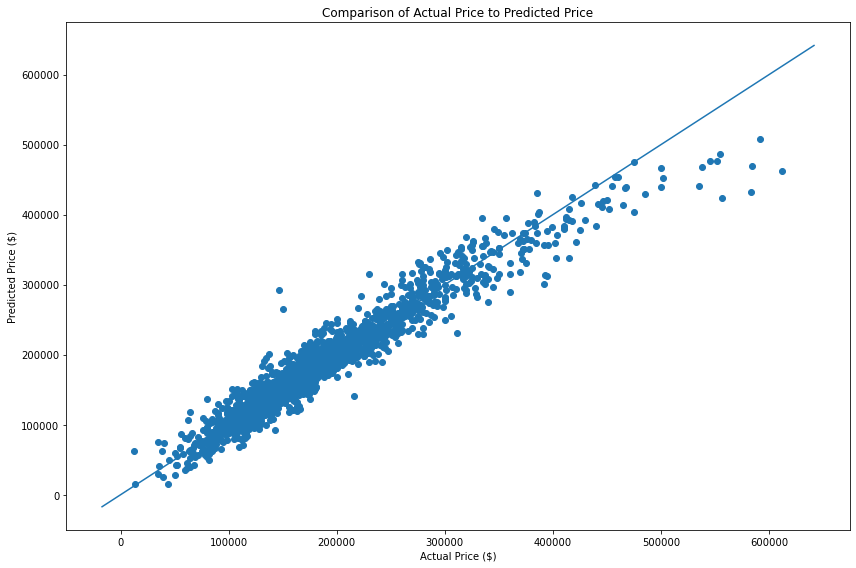

In [8]:
#Credit K Sylvia. Code given during work time
plt.figure(figsize = (12, 8))
plt.scatter(x = df_train['saleprice'], y = model.predict(df_train[features] ) )
plt.title('Comparison of Actual Price to Predicted Price')
xpoints = ypoints = plt.xlim() # code borrowed from kilodalton's response on Stack Overflow
plt.plot(xpoints, ypoints)
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.tight_layout();

## <span style='background :#3FBFBF' >*******************  Log Transformation *******************</span>  

In [9]:
# to do the log transformation....

y_train_log = y_train.map(np.log)
y_test_log = y_test.map(np.log)

cross_val_score(model, X_train, y_train_log).mean()
model.fit(X_train, y_train_log)

log_train_r2 = round(model.score(X_train, y_train_log),4)
log_test_r2 = round(model.score(X_test, y_test_log),4)
log_cv = round(cross_val_score(model, X_train, y_train_log).mean(),4)
log_MRSE = metrics.mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))**.5

print('********* Log Trans *********')                    
print(f'LOG training R^2 score: {log_train_r2}')
print(f'LOG test R^2 score: {log_test_r2}')
print(f'LOG CrossVal score: {log_cv}')
print(f'LOG Mean Root Square Error w/ all cols: {round(log_MRSE,4)}.')                    
                    
print('********* Linear Reg *********')
print(f'LR training R^2 score: {lr_train_r2}')
print(f'LR test R^2 score: {lr_test_r2}')
print(f'LR CrossVal score: {lr_cv}')
print(f'LR Mean Root Square Error w/ all cols: {round(lr_MRSE,2)}.')
print('********* Base Line *********')
print(f'BL Mean Root Square Error w/ all cols: {round(bl_MRSE,2)}.')

### PREDICTIONS AFTER LOG

pred_test = model.predict(df_test[features])
df_test['saleprice'] = np.exp(pred_test)
submission = df_test[['id','saleprice']]
submission.set_index('id', inplace = True)
submission.to_csv('../datasets/compdata/submission_X_LogT.csv')


********* Log Trans *********
LOG training R^2 score: 0.9427
LOG test R^2 score: 0.8844
LOG CrossVal score: -2048322967.2514
LOG Mean Root Square Error w/ all cols: 197648.7548.
********* Linear Reg *********
LR training R^2 score: 0.9353
LR test R^2 score: 0.9303
LR CrossVal score: -35872212778.71786
LR Mean Root Square Error w/ all cols: 20357.77.
********* Base Line *********
BL Mean Root Square Error w/ all cols: 79273.14.


In [10]:
# ********* Log Trans *********
# LOG training R^2 score: 0.9432
# LOG test R^2 score: 0.8844
# LOG CrossVal score: 0.8939
# LOG Mean Root Square Error w/ all cols: 197648.7554.
# ********* Linear Reg *********
# LR training R^2 score: 0.9355
# LR test R^2 score: 0.9302
# LR CrossVal score: 0.90736416
# LR Mean Root Square Error w/ all cols: 20344.33.
# ********* Base Line *********
# BL Mean Root Square Error w/ all cols: 79273.14.

## <span style='background :#3FBFBF' >*******************  Ridge *******************</span>  

In [11]:
ss = StandardScaler()
Z_train = ss.fit_transform(X_train)
Z_test = ss.transform(X_test)

In [12]:
# ridge_model = Ridge(alpha=100)
# ridge_model.fit(Z_train,y_train)
# ridge_cv = ridge_model.fit(Z_train, y_train)

r_alphas = np.logspace(0, 5, 100)
ridge_cv = RidgeCV(alphas=r_alphas, scoring='r2', cv=5)
ridge_cv = ridge_cv.fit(Z_train, y_train)
print(ridge_cv.alpha_)

rdg_train_r2 = round(ridge_cv.score(Z_train, y_train),4)
rdg_test_r2 = round(ridge_cv.score(Z_test, y_test),4)
rdg_cv = round(cross_val_score(ridge_cv, Z_train, y_train).mean(),4)
rdg_MRSE = metrics.mean_squared_error(y_true=y_test, y_pred=ridge_cv.predict(Z_test))**.5


print('********* Ridge *********')
print(f'Ridge training R^2 score: {rdg_train_r2}')
print(f'Ridge test R^2 score: {rdg_test_r2}')
print(f'Ridge CrossVal score: {rdg_cv}')
print(f'Ridge Mean Root Square Error w/ all cols: {round(rdg_MRSE,4)}.')  

print('********* Log Trans *********')                    
print(f'LOG training R^2 score: {log_train_r2}')
print(f'LOG test R^2 score: {log_test_r2}')
print(f'LOG CrossVal score: {log_cv}')
print(f'LOG Mean Root Square Error w/ all cols: {round(log_MRSE,4)}.')                    
                    
print('********* Linear Reg *********')
print(f'LR training R^2 score: {lr_train_r2}')
print(f'LR test R^2 score: {lr_test_r2}')
print(f'LR CrossVal score: {lr_cv}')
print(f'LR Mean Root Square Error w/ all cols: {round(lr_MRSE,2)}.')
print('********* Base Line *********')
print(f'BL Mean Root Square Error w/ all cols: {round(bl_MRSE,2)}.')

X = ss.transform( df_test[features] )
pred_test = ridge_cv.predict(X)
df_test['saleprice'] = pred_test
submission = df_test[['id','saleprice']]
submission.set_index('id', inplace = True)
submission.to_csv('../datasets/compdata/submission_X_ridge.csv')


1.0
********* Ridge *********
Ridge training R^2 score: 0.9378
Ridge test R^2 score: 0.9088
Ridge CrossVal score: 0.9069
Ridge Mean Root Square Error w/ all cols: 24146.0544.
********* Log Trans *********
LOG training R^2 score: 0.9427
LOG test R^2 score: 0.8844
LOG CrossVal score: -2048322967.2514
LOG Mean Root Square Error w/ all cols: 197648.7548.
********* Linear Reg *********
LR training R^2 score: 0.9353
LR test R^2 score: 0.9303
LR CrossVal score: -35872212778.71786
LR Mean Root Square Error w/ all cols: 20357.77.
********* Base Line *********
BL Mean Root Square Error w/ all cols: 79273.14.


In [13]:
# 1.0
# ********* Ridge *********
# Ridge training R^2 score: 0.938
# Ridge test R^2 score: 0.9085
# Ridge CrossVal score: 0.9069
# Ridge Mean Root Square Error w/ all cols: 24181.9579.
# ********* Log Trans *********
# LOG training R^2 score: 0.9432
# LOG test R^2 score: 0.8844
# LOG CrossVal score: 0.8939
# LOG Mean Root Square Error w/ all cols: 197648.7554.
# ********* Linear Reg *********
# LR training R^2 score: 0.9355
# LR test R^2 score: 0.9302
# LR CrossVal score: 0.90736416
# LR Mean Root Square Error w/ all cols: 20344.33.
# ********* Base Line *********
# BL Mean Root Square Error w/ all cols: 79273.14.

## <span style='background :#3FBFBF' >*******************  Lasso *******************</span>  

In [14]:
# ss = StandardScaler()
# Z_train = ss.fit_transform(X_train)
# Z_test = ss.transform(X_test)

# did this above

In [15]:
l_alphas = np.logspace(-3, 0, 100)
lasso_cv = LassoCV(alphas = l_alphas)
lasso_cv.fit(Z_train, y_train);

C:\Users\benro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 205960259202.74008, tolerance: 795350847.2689885
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\benro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 140501991019.67938, tolerance: 795350847.2689885
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\benro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83073170994.91742, tolerance: 795350847.2689885
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\benro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: 

In [16]:
lasso_cv.alpha_

0.08111308307896872

In [17]:
lasso_cv.score(Z_train,y_train), lasso_cv.score(Z_test,y_test)

(0.9381882391107875, 0.9068895498907623)

In [18]:
lso_train_r2 = round(lasso_cv.score(Z_train,y_train),4)
lso_test_r2 = round(lasso_cv.score(Z_test,y_test),4)
lso_cv = round(cross_val_score(lasso_cv, Z_train,y_train).mean(),8)


#lso_MRSE = metrics.mean_squared_error(y_true=df_train['saleprice'], y_pred=model.predict(df_train[features] ))**.5

C:\Users\benro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 149605563330.6833, tolerance: 615983112.7097365
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\benro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 126808042393.1983, tolerance: 615983112.7097365
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\benro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113266824059.1672, tolerance: 615983112.7097365
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\benro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Co

In [19]:
print('********* Lasso *********')
print(f'Lasso training R^2 score: {lso_train_r2}')
print(f'Lasso test R^2 score: {lso_test_r2}')
print(f'Lasso CrossVal score: {lso_cv}')
#print(f'Lasso Mean Root Square Error w/ all cols: {round(log_MRSE,4)}.')  
                
print('********* Ridge *********')
print(f'Ridge training R^2 score: {rdg_train_r2}')
print(f'Ridge test R^2 score: {rdg_test_r2}')
print(f'Ridge CrossVal score: {rdg_cv}')
print(f'Ridge Mean Root Square Error w/ all cols: {round(rdg_MRSE,4)}.')  

print('********* Log Trans *********')                    
print(f'LOG training R^2 score: {log_train_r2}')
print(f'LOG test R^2 score: {log_test_r2}')
print(f'LOG CrossVal score: {log_cv}')
print(f'LOG Mean Root Square Error w/ all cols: {round(log_MRSE,4)}.')                    
                    
print('********* Linear Reg *********')
print(f'LR training R^2 score: {lr_train_r2}')
print(f'LR test R^2 score: {lr_test_r2}')
print(f'LR CrossVal score: {lr_cv}')
print(f'LR Mean Root Square Error w/ all cols: {round(lr_MRSE,2)}.')
print('********* Base Line *********')
print(f'BL Mean Root Square Error w/ all cols: {round(bl_MRSE,2)}.')


X = ss.transform( df_test[features] )
pred_test = lasso_cv.predict(X)
df_test['saleprice'] = pred_test
submission = df_test[['id','saleprice']]
submission.set_index('id', inplace = True)
submission.to_csv('../datasets/compdata/submission_X_lasso.csv')


********* Lasso *********
Lasso training R^2 score: 0.9382
Lasso test R^2 score: 0.9069
Lasso CrossVal score: 0.90643481
********* Ridge *********
Ridge training R^2 score: 0.9378
Ridge test R^2 score: 0.9088
Ridge CrossVal score: 0.9069
Ridge Mean Root Square Error w/ all cols: 24146.0544.
********* Log Trans *********
LOG training R^2 score: 0.9427
LOG test R^2 score: 0.8844
LOG CrossVal score: -2048322967.2514
LOG Mean Root Square Error w/ all cols: 197648.7548.
********* Linear Reg *********
LR training R^2 score: 0.9353
LR test R^2 score: 0.9303
LR CrossVal score: -35872212778.71786
LR Mean Root Square Error w/ all cols: 20357.77.
********* Base Line *********
BL Mean Root Square Error w/ all cols: 79273.14.


In [20]:
********* Lasso *********
Lasso training R^2 score: 0.9384
Lasso test R^2 score: 0.9065
Lasso CrossVal score: 0.9066009
********* Ridge *********
Ridge training R^2 score: 0.938
Ridge test R^2 score: 0.9085
Ridge CrossVal score: 0.9069
Ridge Mean Root Square Error w/ all cols: 24181.9579.
********* Log Trans *********
LOG training R^2 score: 0.9432
LOG test R^2 score: 0.8844
LOG CrossVal score: 0.8939
LOG Mean Root Square Error w/ all cols: 197648.7554.
********* Linear Reg *********
LR training R^2 score: 0.9355
LR test R^2 score: 0.9302
LR CrossVal score: 0.90736416
LR Mean Root Square Error w/ all cols: 20344.33.
********* Base Line *********
BL Mean Root Square Error w/ all cols: 79273.14.

SyntaxError: invalid syntax (Temp/ipykernel_42780/3434373341.py, line 1)